In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
df = pd.read_csv('counties.csv')

df['County'] = df['County'].astype(str) + ", NY"
pct_pos = df["% Positive"]= (df["New Positives"] / df["New Tests"] * 100)

df.head(60)

,County,New Positives,All Positives,New Tests,All Tests,% Positive
0,"Albany, NY",95,5108,3915,239240,2.426564
1,"Allegany, NY",39,846,505,38014,7.722772
2,"Bronx, NY",344,60979,10351,1206589,3.323350
3,"Broome, NY",67,4859,2477,210806,2.704885
4,"Cattaraugus, NY",35,877,481,56542,7.276507


In [2]:
regions = df.County.unique()
regions

array(['Albany, NY', 'Allegany, NY', 'Bronx, NY', 'Broome, NY',
       'Cattaraugus, NY', 'Cayuga, NY', 'Chautauqua, NY', 'Chemung, NY',
       'Chenango, NY', 'Clinton, NY', 'Columbia, NY', 'Cortland, NY',
       'Delaware, NY', 'Dutchess, NY', 'Erie, NY', 'Essex, NY',
       'Franklin, NY', 'Fulton, NY', 'Genesee, NY', 'Greene, NY',
       'Hamilton, NY', 'Herkimer, NY', 'Jefferson, NY', 'Kings, NY',
       'Lewis, NY', 'Livingston, NY', 'Madison, NY', 'Monroe, NY',
       'Montgomery, NY', 'Nassau, NY', 'New York, NY', 'Niagara, NY',
       'Oneida, NY', 'Onondaga, NY', 'Ontario, NY', 'Orange, NY',
       'Orleans, NY', 'Oswego, NY', 'Otsego, NY', 'Putnam, NY',
       'Queens, NY', 'Rensselaer, NY', 'Richmond, NY', 'Rockland, NY',
       'Saratoga, NY', 'Schenectady, NY', 'Schoharie, NY', 'Schuyler, NY',
       'Seneca, NY', 'St. Lawrence, NY', 'Steuben, NY', 'Suffolk, NY',
       'Sullivan, NY', 'Tioga, NY', 'Tompkins, NY', 'Ulster, NY',
       'Warren, NY', 'Washington, NY', 'Wayn

In [3]:
from geopy.geocoders import Bing
from geopy.extra.rate_limiter import RateLimiter
geolocator = Bing(api_key='ApxLuramuz441u7DhIjLsoVIxufcTWRa09sKB1jr5ZKu55P02CCvIPAu_VSHwKQo', timeout=30)
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=2)
regions_dict = {i : geolocator.geocode(i) for i in regions}
regions_dict

{'Albany, NY': Location(Albany, NY, United States, (42.65172576904297, -73.75509643554688, 0.0)),
 'Allegany, NY': Location(Allegany, NY, United States, (42.08806228637695, -78.49125671386719, 0.0)),
 'Bronx, NY': Location(Bronx, NY, United States, (40.82615280151367, -73.9202651977539, 0.0)),
 'Broome, NY': Location(Broome, NY, United States, (42.52092361450195, -74.30384826660156, 0.0)),
 'Cattaraugus, NY': Location(Cattaraugus, NY, United States, (42.32959747314453, -78.86852264404297, 0.0)),
 'Cayuga, NY': Location(Cayuga, NY, United States, (42.91896057128906, -76.72624969482422, 0.0)),
 'Chautauqua, NY': Location(Chautauqua, NY, United States, (42.209285736083984, -79.46292877197266, 0.0)),
 'Chemung, NY': Location(Chemung, NY, United States, (42.008331298828125, -76.62359619140625, 0.0)),
 'Chenango, NY': Location(Chenango, NY, United States, (42.1686897277832, -75.87785339355469, 0.0)),
 'Clinton, NY': Location(Clinton, NY, United States, (43.04859924316406, -75.37799072265625,

In [4]:
regions_df = pd.DataFrame(regions_dict)
regions_df_melted = regions_df.iloc[1:2,:].melt()
regions_df_melted.columns = ['County', 'co-ordinates']

regions_df_melted

,County,co-ordinates
0,"Albany, NY","(42.65172576904297, -73.75509643554688)"
1,"Allegany, NY","(42.08806228637695, -78.49125671386719)"
2,"Bronx, NY","(40.82615280151367, -73.9202651977539)"
3,"Broome, NY","(42.52092361450195, -74.30384826660156)"
4,"Cattaraugus, NY","(42.32959747314453, -78.86852264404297)"
...,...,...
57,"Washington, NY","(41.78553771972656, -73.69046020507812)"
58,"Wayne, NY","(42.4705810546875, -77.10536193847656)"
59,"Westchester, NY","(40.840030670166016, -73.84453582763672)"
60,"Wyoming, NY","(42.8284797668457, -78.08788299560547)"


In [5]:
merge_df = pd.merge(df, regions_df_melted, left_on='County', right_on='County')

merge_df.head()

# df = pd.read_csv('coords_data.csv')

,County,New Positives,All Positives,New Tests,All Tests,% Positive,co-ordinates
0,"Albany, NY",95,5108,3915,239240,2.426564,"(42.65172576904297, -73.75509643554688)"
1,"Allegany, NY",39,846,505,38014,7.722772,"(42.08806228637695, -78.49125671386719)"
2,"Bronx, NY",344,60979,10351,1206589,3.323350,"(40.82615280151367, -73.9202651977539)"
3,"Broome, NY",67,4859,2477,210806,2.704885,"(42.52092361450195, -74.30384826660156)"
4,"Cattaraugus, NY",35,877,481,56542,7.276507,"(42.32959747314453, -78.86852264404297)"


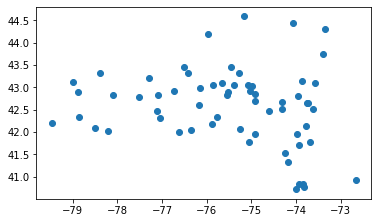

In [6]:
merge_df[['latitude', 'longitude']] = pd.DataFrame(merge_df['co-ordinates'].tolist(), index=df.index)

ny_gdf = gpd.GeoDataFrame(merge_df, geometry=gpd.points_from_xy(merge_df.longitude, merge_df.latitude))

ny_gdf.head()
ny_gdf.plot()

In [7]:
from shapely.geometry import Point, Polygon
usa = gpd.read_file('tl_2019_us_county/tl_2019_us_county.shp')
usa.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680962890,61582307,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016819475,29089486,+34.3592729,-104.3686961,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169270569,22849484,+40.7835474,-096.6886584,"POLYGON ((-96.91075 40.78494, -96.91075 40.790..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645188,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27367 40.08940, -98.27367 40.089..."


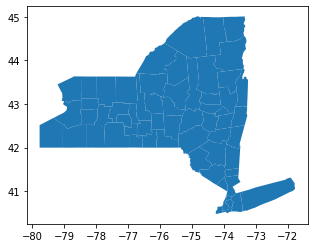

In [8]:
ny = usa[usa['STATEFP'] == '36']
ny.to_csv('nys_counties.csv')
ny.plot()

In [9]:
crs = {'init': 'epsg:4326'}
cov_gdf = gpd.GeoDataFrame(merge_df, crs=crs)
ny_gdf = gpd.GeoDataFrame(ny, crs=crs)

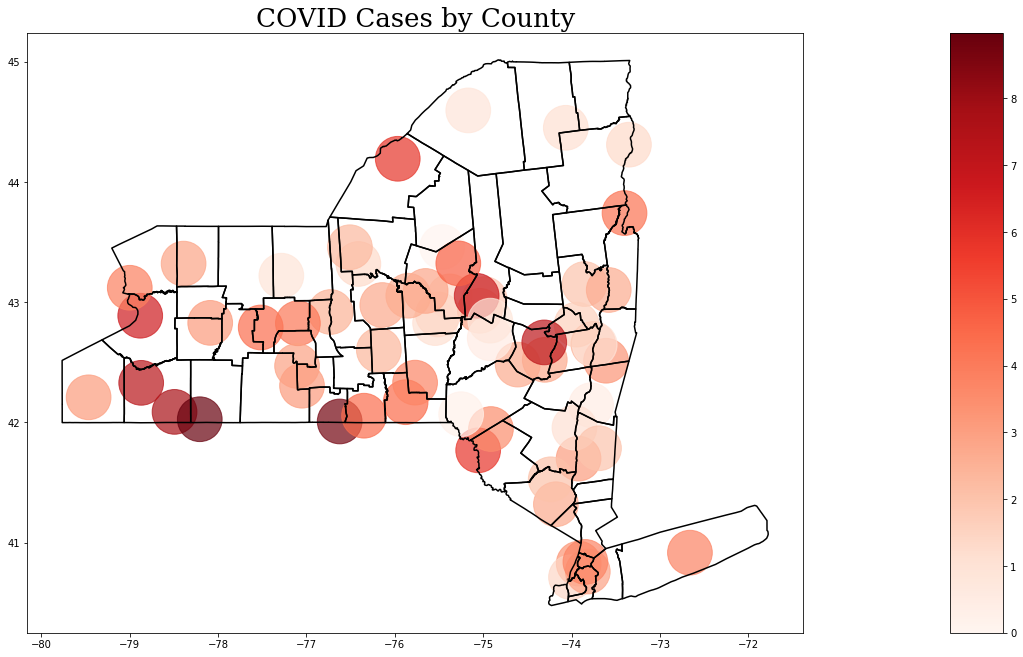

In [10]:
from mpl_toolkits.axes_grid1 import make_axes_locatable 
# This is a function to allow us to make the legend pretty
fig, ax = plt.subplots(figsize = (20,16)) 
plt.title('COVID Cases by County', fontsize=26, fontfamily='serif')
#this part makes the legend the same size as our map, for prettiness
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
ny.boundary.plot(ax=ax, color='Black') 
# using the boundary method here to get the outlines of the states, an aesthetic decision
cov_gdf.plot(cmap='Reds', column='% Positive', legend=True, ax=ax, s=2000, alpha=0.7, cax=cax)
# this saves a copy of the viz as a jpg so we can easily share it with our friends on twitter!
plt.savefig('NYS COVID.jpg', format='jpg')